<a href="https://colab.research.google.com/github/AndresChavez123/SenalesySistemas/blob/main/Resumen_conceptos_clave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Conceptos claves **

La investigacion de estas fuentes es parte fundamental del pro
yecto. Deben ser capaces de explicar los conceptos basandose en
ellas.


# 1. Transformada de Fourier (FT, DFT, FFT)

La **Transformada de Fourier** permite analizar señales en el **dominio de la frecuencia**, lo cual es esencial en procesamiento de señales, electrónica, telecomunicaciones y más.



## - Transformada de Fourier (FT)

La **Transformada de Fourier continua** convierte una señal continua en el tiempo \( x(t) \) a su representación en frecuencia \( X(f) \):

$$
X(f) = \int_{-\infty}^{\infty} x(t) \cdot e^{-j2\pi f t} \, dt
$$

- \( X(f) \): muestra cuánta energía hay en cada frecuencia.
- Se usa en teoría de señales, análisis espectral, etc.

La inversa permite recuperar la señal original:

$$
x(t) = \int_{-\infty}^{\infty} X(f) \cdot e^{j2\pi f t} \, df
$$



## - Transformada Discreta de Fourier (DFT)

Cuando la señal es **discreta y de longitud finita**, usamos la **DFT**:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N} kn}
\quad \text{para } k = 0, 1, ..., N-1
$$

- Es la versión computacional de la FT para señales digitales.
- Produce un espectro **discreto y periódico**.



## - Transformada Rápida de Fourier (FFT)

La **FFT** es un algoritmo eficiente para calcular la DFT, reduciendo el tiempo de cómputo:

- DFT normal: \( O(N^2) \)
- FFT: \( O(N \log N) \)

Se usa ampliamente en aplicaciones reales: audio, imagen, radares, sensores, etc.



## Comparación

| Característica | FT | DFT | FFT |
|----------------|----|-----|-----|
| Tipo de señal | Continua | Discreta y finita | Discreta y finita |
| Fórmula | Integral | Suma | Suma (optimizada) |
| ¿Es algoritmo? | No | No | Sí |
| Uso | Teórico | Computacional | Computacional eficiente |



##  Ejemplo conceptual

Si una señal contiene dos frecuencias:

$$
x(t) = \cos(2\pi \cdot 10t) + \cos(2\pi \cdot 50t)
$$

- En el dominio del tiempo: se ve como la suma de ondas.
- En el dominio de la frecuencia: se verán **dos picos** en 10 Hz y 50 Hz.

La FFT nos permite detectar esas frecuencias automáticamente.


Ejemplo de Transformada de Fourier (FT, DFT, FFT) en codigo python

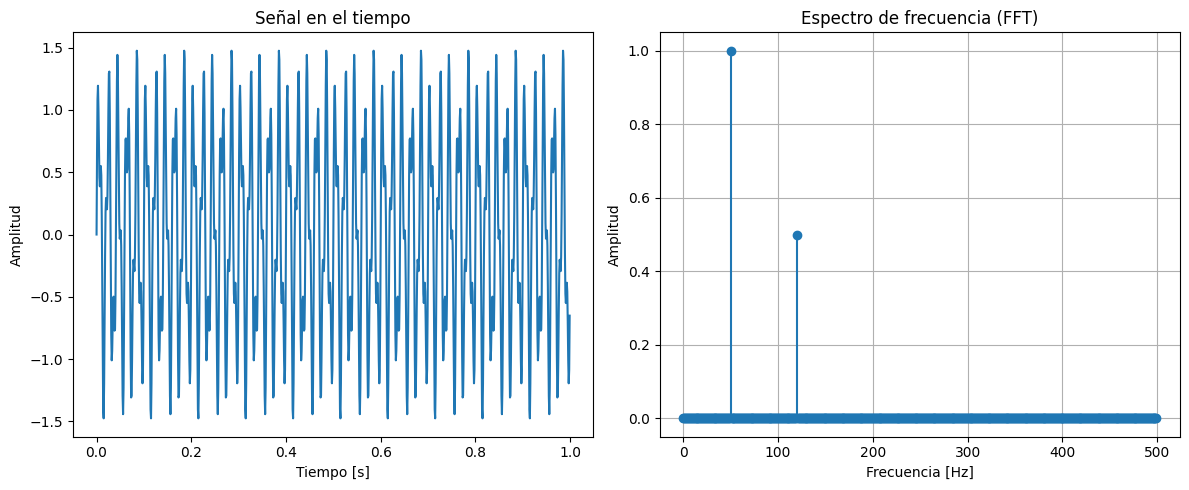

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000              # Frecuencia de muestreo (Hz)
T = 1                  # Duración (segundos)
t = np.linspace(0, T, int(fs*T), endpoint=False)  # Vector de tiempo

# Señal compuesta por dos senoidales: 50 Hz y 120 Hz
f1 = 50   # Frecuencia 1
f2 = 120  # Frecuencia 2
x = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

# FFT
N = len(x)
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, 1/fs)  # Eje de frecuencias

# Solo parte positiva del espectro
half_N = N // 2
X_magnitude = np.abs(X[:half_N]) * 2 / N
freqs_half = freqs[:half_N]

# Gráficos
plt.figure(figsize=(12, 5))

# Señal en el tiempo
plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.title("Señal en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# Espectro de frecuencia
plt.subplot(1, 2, 2)
plt.stem(freqs_half, X_magnitude, basefmt=" ")
plt.title("Espectro de frecuencia (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()


¿Qué muestra este código?
Crea una señal compuesta por dos senoidales:

- 50 Hz (amplitud 1)

- 120 Hz (amplitud 0.5)

Aplica la FFT para transformarla al dominio de la frecuencia

 Grafica:

- Señal original en el tiempo.

- Magnitud de las frecuencias en el espectro.

- Resultado esperado
Verás dos picos en el gráfico de la derecha:

- Uno en 50 Hz con mayor amplitud.

- Otro en 120 Hz, más pequeño.

Esto confirma que la FFT puede detectar qué frecuencias contiene una señal digital, justo como lo hace en audio, vibraciones, comunicaciones, etc.

#  2. Filtrado Digital (FIR / IIR)

El **filtrado digital** es el proceso de modificar o extraer información de una señal digital mediante operaciones matemáticas. Se usa en procesamiento de audio, comunicaciones, imágenes, instrumentación y muchas otras áreas.

Los filtros digitales se clasifican principalmente en:

- **FIR (Finite Impulse Response)** — Respuesta al impulso finita.
- **IIR (Infinite Impulse Response)** — Respuesta al impulso infinita.


##  Filtros FIR (Finite Impulse Response)

Un filtro FIR tiene una **respuesta al impulso finita**, es decir, después de cierto número de muestras, su salida se vuelve cero.

###  Ecuación general:

$$
y[n] = \sum_{k=0}^{M} b_k \cdot x[n - k]
$$

- \( x[n] \): entrada del filtro
- \( y[n] \): salida del filtro
- \( b_k \): coeficientes del filtro
- \( M \): orden del filtro

###  Características:

- Siempre **estables** (no explotan).
- **Lineales y de fase lineal** (no distorsionan la forma de la señal).
- Requieren más coeficientes para lograr respuestas agudas (más costosos computacionalmente).



##  Filtros IIR (Infinite Impulse Response)

Los filtros IIR tienen una **respuesta al impulso infinita**, ya que incluyen retroalimentación (valores pasados de la salida).

###  Ecuación general:

$$
y[n] = \sum_{k=0}^{M} b_k \cdot x[n - k] - \sum_{k=1}^{N} a_k \cdot y[n - k]
$$

- Usa **coeficientes de entrada y de salida**.
- El nombre viene porque, en teoría, su respuesta al impulso nunca se anula completamente.

###  Características:

- **Más eficientes** (logran respuestas complejas con menos coeficientes).
- **Pueden ser inestables** si no se diseñan correctamente.
- No garantizan fase lineal.



##  Ejemplo conceptual

- Un filtro **FIR** actúa como un promedio móvil de la señal.
- Un filtro **IIR** puede parecerse más a un sistema físico (como un circuito RC con retroalimentación).

Ambos tipos de filtros son usados ampliamente dependiendo de los **requisitos del sistema**, como precisión, velocidad, estabilidad y consumo de recursos.


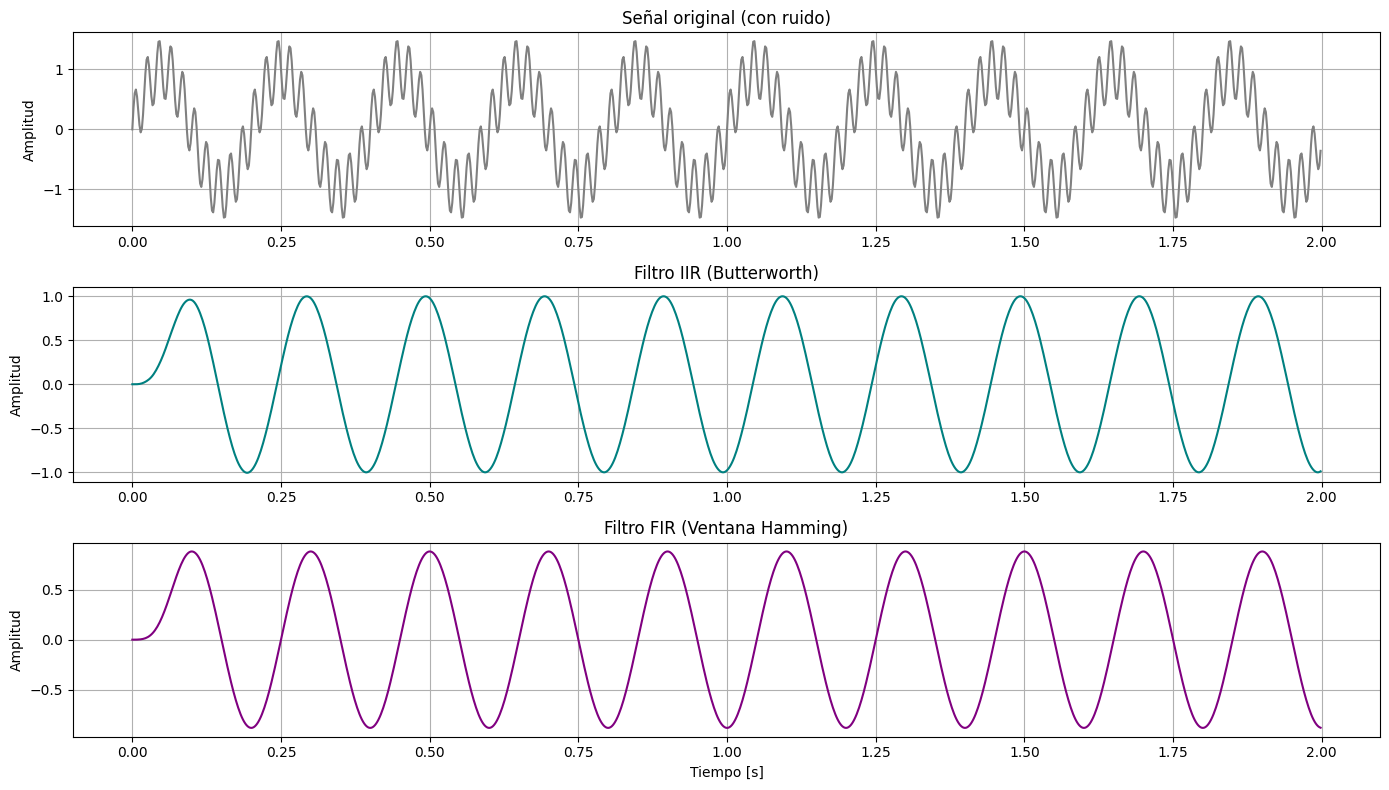

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, firwin

# 1. Crear señal ruidosa
fs = 500
T = 2
t = np.linspace(0, T, int(fs*T), endpoint=False)
signal_clean = np.sin(2 * np.pi * 5 * t)
noise = 0.5 * np.sin(2 * np.pi * 50 * t)
x = signal_clean + noise

# 2. Filtro IIR
iir_order = 4
cutoff_iir = 10
b_iir, a_iir = butter(iir_order, cutoff_iir / (fs / 2), btype='low')
y_iir = lfilter(b_iir, a_iir, x)

# 3. Filtro FIR
fir_order = 50
b_fir = firwin(fir_order + 1, cutoff_iir / (fs / 2), window='hamming')
y_fir = lfilter(b_fir, [1.0], x)

# 4. Graficar
plt.figure(figsize=(14, 8))

# Señal original
plt.subplot(3, 1, 1)
plt.plot(t, x, label="Señal ruidosa", color='gray')
plt.title("Señal original (con ruido)")
plt.ylabel("Amplitud")
plt.grid()

# Salida IIR
plt.subplot(3, 1, 2)
plt.plot(t, y_iir, label="Salida IIR", color='teal')
plt.title("Filtro IIR (Butterworth)")
plt.ylabel("Amplitud")
plt.grid()

# Salida FIR
plt.subplot(3, 1, 3)
plt.plot(t, y_fir, label="Salida FIR", color='purple')
plt.title("Filtro FIR (Ventana Hamming)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()


Que muestra el codigo?

- La señal ruidosa original tiene una señal útil de 5 Hz más un ruido de 50 Hz.

- El filtro IIR (Butterworth) atenua el ruido rápidamente, pero puede tener un poco de distorsión en fase.

- El filtro FIR también elimina el ruido, pero de forma más suave y con fase lineal (sin deformar la forma de onda).

#3. Senales Analıticas y la Transformada de Hilbert.

 Señales Analíticas y la Transformada de Hilbert

##  Definición

Una **señal analítica** \( x_a(t) \) es una señal compleja formada a partir de una señal real \( x(t) \), cuya parte imaginaria es la **Transformada de Hilbert** \( \hat{x}(t) \):

$$
x_a(t) = x(t) + j \cdot \hat{x}(t)
$$

Donde la transformada de Hilbert se define como:

$$
\hat{x}(t) = \mathcal{H}\{x(t)\} = \frac{1}{\pi} \, \text{p.v.} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau} \, d\tau
$$

>  Esta operación introduce un desfase de \( \frac{\pi}{2} \) (90°) en cada componente de frecuencia positiva.



##  Propiedades importantes

- La señal analítica **solo tiene componentes de frecuencia positiva**.
- La **envolvente** de la señal real se calcula como:

$$
A(t) = |x_a(t)| = \sqrt{x(t)^2 + \hat{x}(t)^2}
$$

- La **fase instantánea** es:

$$
\phi(t) = \arg(x_a(t))
$$



##  Aplicaciones

- Extracción de envolvente (detección en AM).
- Análisis de fase instantánea en comunicaciones y señales biomédicas.
- Detección de fallas mecánicas.


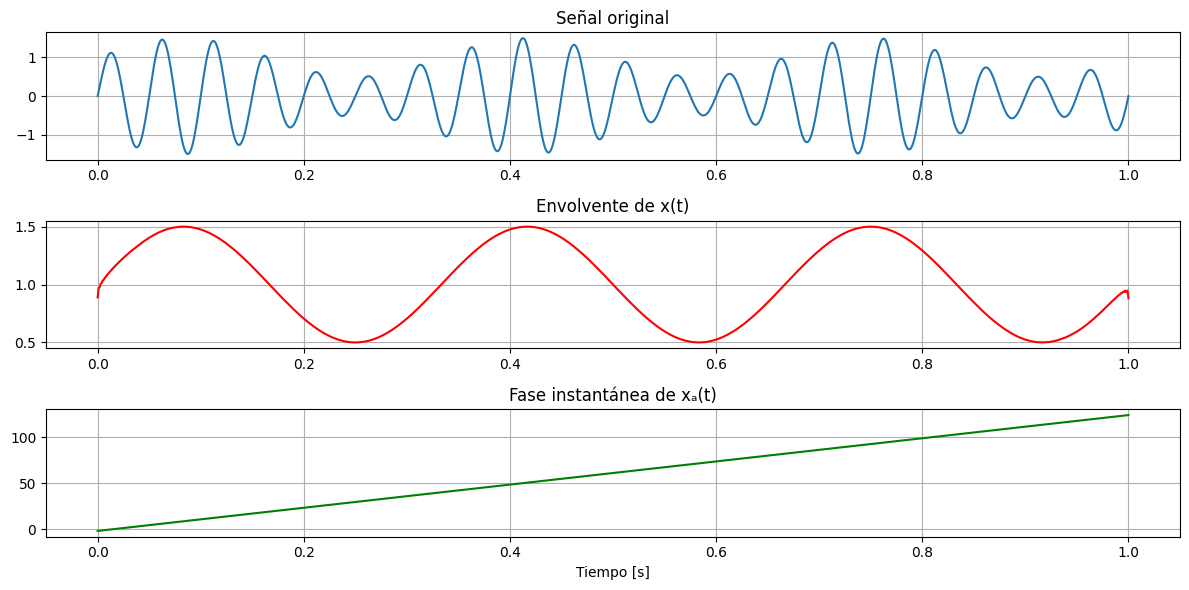

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Señal real: una señal senoidal modulada en amplitud
t = np.linspace(0, 1, 1000)
x = (1 + 0.5 * np.sin(2 * np.pi * 3 * t)) * np.sin(2 * np.pi * 20 * t)

# Transformada de Hilbert
x_analytic = hilbert(x)
amplitude_envelope = np.abs(x_analytic)
instantaneous_phase = np.unwrap(np.angle(x_analytic))

# Graficar
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, x, label='x(t)')
plt.title('Señal original')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, amplitude_envelope, label='Envolvente', color='red')
plt.title('Envolvente de x(t)')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, instantaneous_phase, label='Fase Instantánea', color='green')
plt.title('Fase instantánea de xₐ(t)')
plt.xlabel('Tiempo [s]')
plt.grid()

plt.tight_layout()
plt.show()


Qué se ve en los gráficos?

Arriba: señal senoidal modulada.

Medio: su envolvente (como "curva suave" encima).

Abajo: cómo varía la fase de la señal con el tiempo.



# 4.Senales en Fase y Cuadratura (I/Q) y Modulacion QAM.

Señales en Fase y Cuadratura (I/Q) y Modulación QAM

##  Señal en Fase y Cuadratura (I/Q)

Una señal en fase y cuadratura se representa como:

$$
s(t) = I(t)\cos(2\pi f_c t) - Q(t)\sin(2\pi f_c t)
$$

Donde:
- \( I(t) \) es la **componente en fase** (_In-phase_).
- \( Q(t) \) es la **componente en cuadratura** (_Quadrature-phase_).
- \( f_c \) es la frecuencia de portadora.

También puede escribirse como una señal compleja:

$$
s(t) = \text{Re}\left\{ z(t)e^{j2\pi f_c t} \right\} = I(t)\cos(2\pi f_c t) - Q(t)\sin(2\pi f_c t)
$$

Con:

$$
z(t) = I(t) + jQ(t)
$$

>  Las señales I y Q representan la misma información pero en fases ortogonales (90° de diferencia).



##  Modulación QAM (Quadrature Amplitude Modulation)

QAM combina **modulación de amplitud** y **modulación de fase** usando las componentes I y Q:

$$
s(t) = A_I \cos(2\pi f_c t) + A_Q \sin(2\pi f_c t)
$$

- Cada símbolo se representa como un punto en el plano I-Q.
- La constelación QAM puede tener múltiples niveles: **4-QAM, 16-QAM, 64-QAM, 256-QAM**, etc.

###  Diagrama de Constelación

Cada punto en la constelación representa un símbolo:

- El eje horizontal representa \( I \)
- El eje vertical representa \( Q \)
- La distancia entre puntos afecta la **robustez al ruido** y la **velocidad de transmisión**



##  Ventajas de I/Q y QAM

- Permiten una **alta eficiencia espectral**.
- Se utilizan en sistemas modernos como Wi-Fi, 4G/5G, DVB, etc.
- El procesamiento digital I/Q permite la **implementación eficiente de transmisores y receptores** en DSP o FPGA.






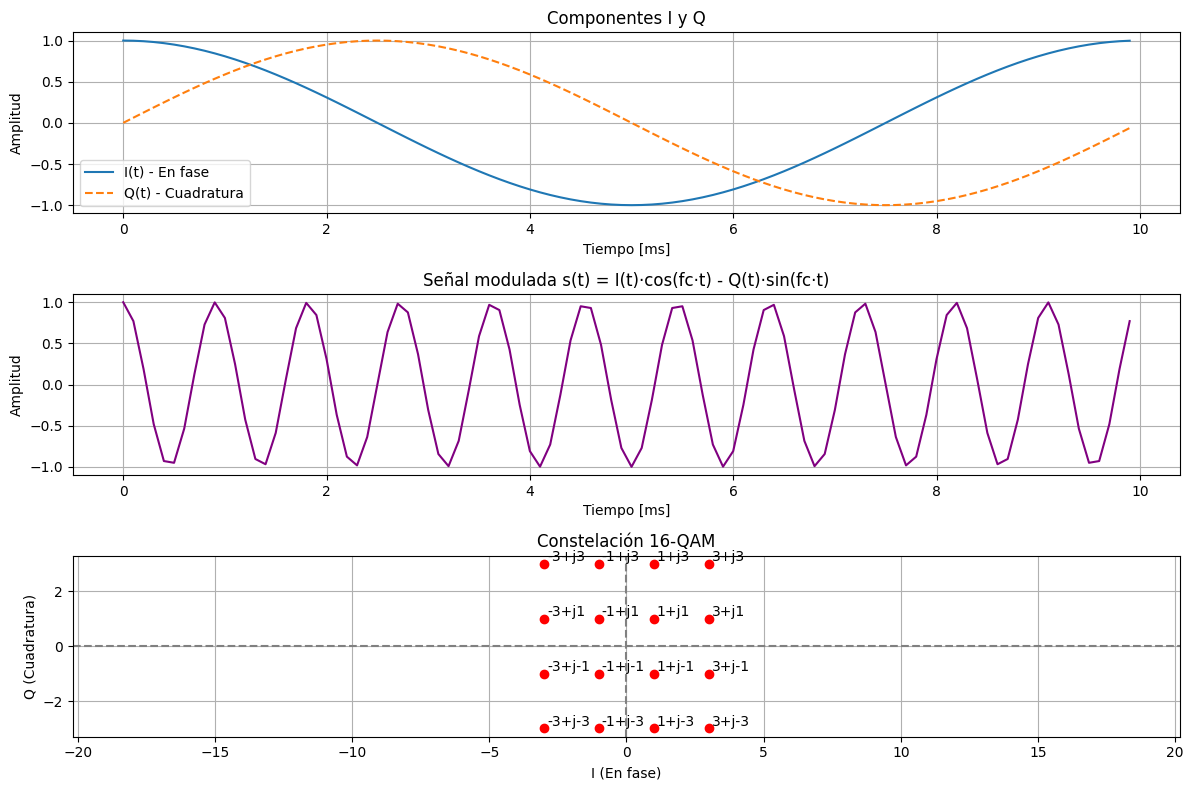

In [ ]:
# ===============================
# Ejemplo de señales I/Q y QAM
# ===============================
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fc = 1000            # Frecuencia portadora (Hz)
fs = 10000           # Frecuencia de muestreo (Hz)
Ts = 1/fs            # Periodo de muestreo
t = np.arange(0, 0.01, Ts)  # Tiempo 10 ms

# Señales I (en fase) y Q (en cuadratura)
I = np.cos(2 * np.pi * 100 * t)  # Componente en fase: coseno de 100 Hz
Q = np.sin(2 * np.pi * 100 * t)  # Componente en cuadratura: seno de 100 Hz

# Señal I/Q modulada sobre portadora (modulación QAM)
s_t = I * np.cos(2 * np.pi * fc * t) - Q * np.sin(2 * np.pi * fc * t)

# Gráfico de señales
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t*1000, I, label='I(t) - En fase')
plt.plot(t*1000, Q, label='Q(t) - Cuadratura', linestyle='--')
plt.title('Componentes I y Q')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [ms]')
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(t*1000, s_t, color='purple')
plt.title('Señal modulada s(t) = I(t)·cos(fc·t) - Q(t)·sin(fc·t)')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [ms]')
plt.grid()

# Constelación 16-QAM
qam_levels = [-3, -1, 1, 3]
I_points, Q_points = np.meshgrid(qam_levels, qam_levels)
symbols = I_points.flatten() + 1j * Q_points.flatten()

plt.subplot(3,1,3)
plt.plot(np.real(symbols), np.imag(symbols), 'ro')
for s in symbols:
    plt.text(np.real(s)+0.1, np.imag(s)+0.1, f"{int(np.real(s))}+j{int(np.imag(s))}")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Constelación 16-QAM')
plt.xlabel('I (En fase)')
plt.ylabel('Q (Cuadratura)')
plt.grid()
plt.axis('equal')

plt.tight_layout()
plt.show()


Qué hace este código?
Genera señales I(t) y Q(t) con una frecuencia base de 100 Hz.

Modula esas señales sobre una portadora de 1 kHz para obtener
𝑠
(
𝑡
)
s(t).

Grafica:

Las señales I(t) y Q(t)

La señal modulada s(t)

La constelación de símbolos 16-QAM (visualización de amplitudes/fases)

# 5.OFDM - Multiplexacion por Division de Frecuencias Ortogonales.


##  OFDM: Multiplexación por División de Frecuencia Ortogonal

**OFDM (Orthogonal Frequency Division Multiplexing)** es una técnica de modulación digital que divide los datos en muchas subportadoras ortogonales, transmitiéndolos en paralelo.

###  Características clave:
- Usa muchas **subportadoras** muy cercanas en frecuencia, pero **ortogonales**, por lo que no interfieren entre sí.
- Se implementa con **IFFT/FFT** (transformadas rápidas).
- Añade un **prefijo cíclico** para evitar interferencia entre símbolos (ISI).
- Alta **eficiencia espectral** y robustez ante **canales dispersivos**.

###  Ventajas:
- Resistente al desvanecimiento y al retardo del canal.
- Facilita la ecualización.
- Usado en Wi-Fi, 4G/5G, DVB, ADSL.



#  6. Comunicación WiFi y 5G: Principios básicos, protocolos y su relación con Fourier y filtrado digital

La **comunicación inalámbrica** (como WiFi y 5G) permite transmitir datos sin necesidad de cables, usando ondas electromagnéticas en diferentes bandas de frecuencia.

Estas tecnologías se basan en principios clave de la **teoría de señales y sistemas**, incluyendo conceptos como la **Transformada de Fourier**, **modulación**, y **filtrado digital**.



## WiFi (IEEE 802.11)

###  Principios básicos:
- WiFi transmite datos mediante ondas de radio en las bandas de **2.4 GHz** y **5 GHz**.
- Utiliza técnicas como **OFDM (Orthogonal Frequency Division Multiplexing)**, que divide la señal en múltiples subportadoras ortogonales.
- OFDM depende directamente de la **Transformada de Fourier** y su implementación eficiente, la **FFT**.

###  Protocolos:
- IEEE 802.11a/b/g/n/ac/ax: cada uno mejora velocidad, alcance o eficiencia.
- Uso de protocolos de control como **MAC (Medium Access Control)** y **ARP**.



##  5G (Redes móviles de quinta generación)

###  Principios básicos:
- Opera en bandas desde **sub-6 GHz** hasta **mmWave (24–100 GHz)**.
- Ofrece **alta velocidad (>10 Gbps)**, **baja latencia (<1 ms)** y capacidad masiva.
- Utiliza técnicas avanzadas como:
  - OFDM
  - **MIMO masivo** (múltiples antenas)
  - Beamforming (dirección adaptativa de señal)

###  Protocolos:
- Arquitectura basada en el estándar **3GPP (Rel-15/16 en adelante)**.
- Protocolos de comunicación como:
  - **NR (New Radio)** para la capa física.
  - **SDAP, RLC, MAC, PDCP** para manejo de datos.





##  Ejemplo de aplicación: OFDM con FFT

OFDM divide un canal de alta velocidad en muchos canales más lentos usando la **FFT** para multiplexar datos en diferentes frecuencias.

Si una señal contiene símbolos \( x_0, x_1, \dots, x_{N-1} \), se aplica la **IFFT**:

$$
s[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j2\pi kn/N}
$$

Esto genera la señal compuesta en el tiempo.

El receptor aplica la **FFT**:

$$
X[k] = \sum_{n=0}^{N-1} s[n] \cdot e^{-j2\pi kn/N}
$$

para recuperar los datos originales de cada subportadora.


##  Resumen

- **WiFi y 5G** se basan en técnicas avanzadas de modulación, multiplexación y filtrado.
- Usan intensivamente la **FFT** para dividir señales en componentes de frecuencia.
- Dependen de **filtros digitales** para limpiar, separar y reconstruir señales.
- Todos los conceptos vistos (FT, DFT, FFT, FIR, IIR) son fundamentales para entender cómo funcionan las redes inalámbricas modernas.


 Bits transmitidos: 320
 Errores de bit: 0


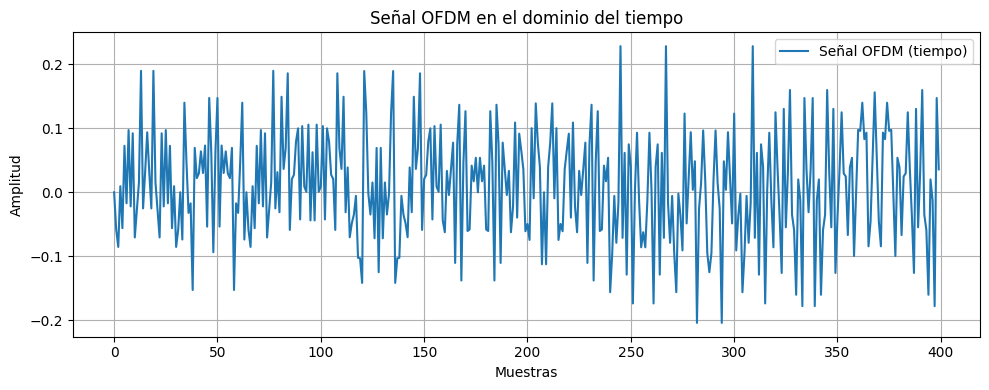

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 1. Parámetros del sistema OFDM
# ============================================
N = 64                      # Número de subportadoras (tamaño FFT)
num_symbols = 5             # Cantidad de símbolos OFDM
cp_len = 16                 # Longitud del prefijo cíclico

# ============================================
# 2. Datos digitales simulados (BPSK)
# ============================================
# Creamos una secuencia binaria aleatoria: 0 → -1, 1 → +1
bits = np.random.randint(0, 2, N * num_symbols)
symbols = 2*bits - 1  # BPSK: convierte 0 → -1 y 1 → +1

# Agrupamos en bloques de N símbolos (uno por subportadora)
ofdm_data = symbols.reshape((num_symbols, N))

# ============================================
# 3. Modulación OFDM (IFFT + prefijo cíclico)
# ============================================
ofdm_time = np.fft.ifft(ofdm_data, axis=1)  # IFFT por filas
ofdm_cp = np.concatenate([ofdm_time[:, -cp_len:], ofdm_time], axis=1)  # Añadir CP
ofdm_tx = ofdm_cp.flatten()  # Señal transmitida en el tiempo

# ============================================
# 4. Canal: aquí suponemos canal ideal (sin ruido)
# ============================================
rx_signal = ofdm_tx.copy()  # Sin ruido ni distorsión

# ============================================
# 5. Demodulación OFDM (quita CP + FFT)
# ============================================
rx_blocks = rx_signal.reshape((num_symbols, N + cp_len))
rx_no_cp = rx_blocks[:, cp_len:]  # Quitar CP
rx_freq = np.fft.fft(rx_no_cp, axis=1)  # FFT para recuperar símbolos

# ============================================
# 6. Decodificación (detección BPSK)
# ============================================
rx_bits = (np.real(rx_freq) > 0).astype(int)
bit_errors = np.sum(bits != rx_bits.flatten())

# ============================================
# 7. Resultados y visualización
# ============================================
print(f" Bits transmitidos: {len(bits)}")
print(f" Errores de bit: {bit_errors}")

# Mostrar una trama OFDM en el tiempo
plt.figure(figsize=(10, 4))
plt.plot(np.real(ofdm_tx), label="Señal OFDM (tiempo)")
plt.title("Señal OFDM en el dominio del tiempo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


¿Qué hace este código?

Crea datos binarios y los modula usando BPSK.

Aplica IFFT para formar símbolos OFDM.

Añade prefijo cíclico (CP) para evitar interferencia entre símbolos.

Demodula usando la FFT y detecta los bits.

Mide errores (en este caso cero, porque el canal es ideal).

Muestra la señal en el dominio del tiempo.